In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [5]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [6]:
#At December 1 1998
lim_catfish_sales[datetime(1998,12,1)] = 10000

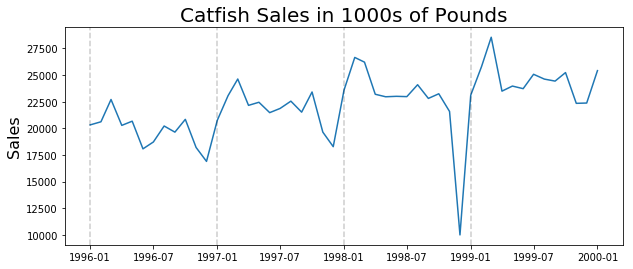

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [8]:
first_diff = lim_catfish_sales.diff()[1:]

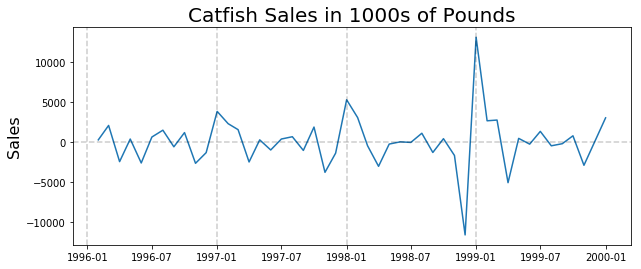

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [10]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

In [11]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [12]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data.values, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average

In [13]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

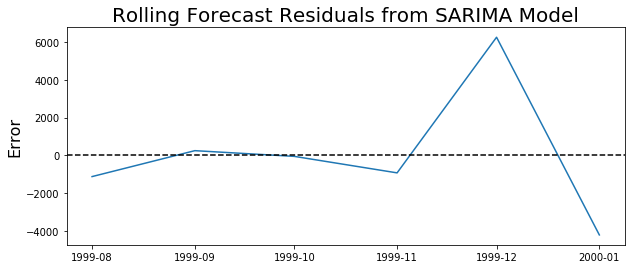

In [14]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

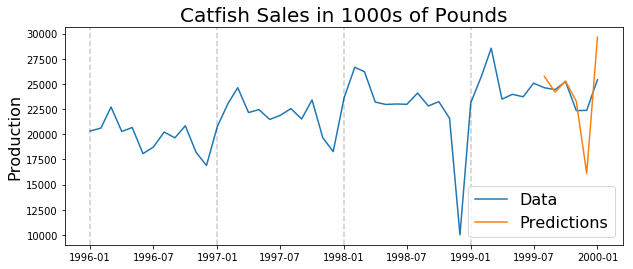

In [15]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))


Mean Absolute Percent Error: 0.091


In [17]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 3142.5598641871566


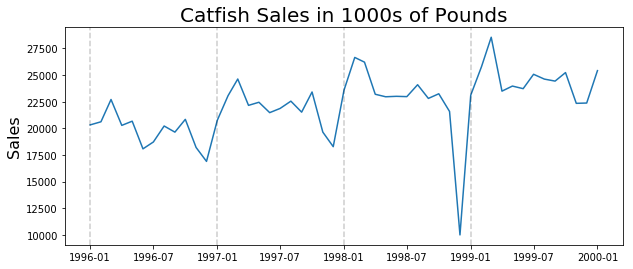

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [19]:
rolling_deviations=pd.Series(dtype=float,index=lim_catfish_sales.index)
rolling_deviations

Date
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
1996-06-01   NaN
1996-07-01   NaN
1996-08-01   NaN
1996-09-01   NaN
1996-10-01   NaN
1996-11-01   NaN
1996-12-01   NaN
1997-01-01   NaN
1997-02-01   NaN
1997-03-01   NaN
1997-04-01   NaN
1997-05-01   NaN
1997-06-01   NaN
1997-07-01   NaN
1997-08-01   NaN
1997-09-01   NaN
1997-10-01   NaN
1997-11-01   NaN
1997-12-01   NaN
1998-01-01   NaN
1998-02-01   NaN
1998-03-01   NaN
1998-04-01   NaN
1998-05-01   NaN
1998-06-01   NaN
1998-07-01   NaN
1998-08-01   NaN
1998-09-01   NaN
1998-10-01   NaN
1998-11-01   NaN
1998-12-01   NaN
1999-01-01   NaN
1999-02-01   NaN
1999-03-01   NaN
1999-04-01   NaN
1999-05-01   NaN
1999-06-01   NaN
1999-07-01   NaN
1999-08-01   NaN
1999-09-01   NaN
1999-10-01   NaN
1999-11-01   NaN
1999-12-01   NaN
2000-01-01   NaN
Freq: MS, dtype: float64

In [20]:
for date in rolling_deviations.index:
    print(date)

1996-01-01 00:00:00
1996-02-01 00:00:00
1996-03-01 00:00:00
1996-04-01 00:00:00
1996-05-01 00:00:00
1996-06-01 00:00:00
1996-07-01 00:00:00
1996-08-01 00:00:00
1996-09-01 00:00:00
1996-10-01 00:00:00
1996-11-01 00:00:00
1996-12-01 00:00:00
1997-01-01 00:00:00
1997-02-01 00:00:00
1997-03-01 00:00:00
1997-04-01 00:00:00
1997-05-01 00:00:00
1997-06-01 00:00:00
1997-07-01 00:00:00
1997-08-01 00:00:00
1997-09-01 00:00:00
1997-10-01 00:00:00
1997-11-01 00:00:00
1997-12-01 00:00:00
1998-01-01 00:00:00
1998-02-01 00:00:00
1998-03-01 00:00:00
1998-04-01 00:00:00
1998-05-01 00:00:00
1998-06-01 00:00:00
1998-07-01 00:00:00
1998-08-01 00:00:00
1998-09-01 00:00:00
1998-10-01 00:00:00
1998-11-01 00:00:00
1998-12-01 00:00:00
1999-01-01 00:00:00
1999-02-01 00:00:00
1999-03-01 00:00:00
1999-04-01 00:00:00
1999-05-01 00:00:00
1999-06-01 00:00:00
1999-07-01 00:00:00
1999-08-01 00:00:00
1999-09-01 00:00:00
1999-10-01 00:00:00
1999-11-01 00:00:00
1999-12-01 00:00:00
2000-01-01 00:00:00


In [21]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window=lim_catfish_sales.loc[:date]
    #get the deviation within this window
    rolling_deviations.loc[date]=window.std()

In [22]:
rolling_deviations

Date
1996-01-01            NaN
1996-02-01     205.768073
1996-03-01    1299.415638
1996-04-01    1159.804402
1996-05-01    1013.927364
1996-06-01    1472.873925
1996-07-01    1494.119999
1996-08-01    1383.304919
1996-09-01    1307.227601
1996-10-01    1252.448784
1996-11-01    1332.960860
1996-12-01    1558.985101
1997-01-01    1517.209973
1997-02-01    1692.431088
1997-03-01    2010.509739
1997-04-01    1992.668425
1997-05-01    1987.026451
1997-06-01    1938.591053
1997-07-01    1904.557067
1997-08-01    1898.637669
1997-09-01    1857.100526
1997-10-01    1893.328573
1997-11-01    1869.866782
1997-12-01    1905.381045
1998-01-01    1946.757472
1998-02-01    2215.766600
1998-03-01    2382.971244
1998-04-01    2365.400842
1998-05-01    2341.294209
1998-06-01    2318.361317
1998-07-01    2295.022274
1998-08-01    2302.495056
1998-09-01    2275.724678
1998-10-01    2257.561866
1998-11-01    2224.198474
1998-12-01    2933.086690
1999-01-01    2906.171729
1999-02-01    2952.820528
1999-03

In [23]:
#Get the difference in deviation between one time point and the next
diff_rolling_deviations=rolling_deviations.diff()
diff_rolling_deviations=diff_rolling_deviations.dropna()

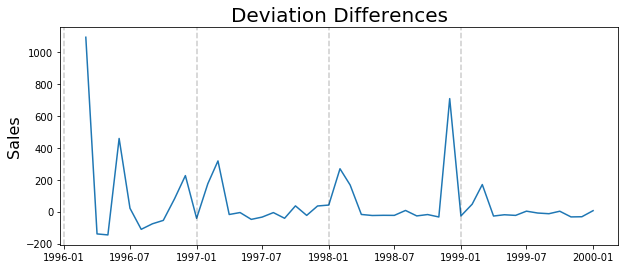

In [24]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [25]:
month_deviations=lim_catfish_sales.groupby(lambda x: x.month).std()
month_deviations

Date
1     2105.840402
2     2741.500973
3     2473.136790
4     1452.396726
5     1379.643764
6     2510.305343
7     2648.906992
8     1973.452305
9     2025.372949
10    1800.032407
11    1876.056947
12    5146.228263
Name: Total, dtype: float64

Text(0, 0.5, 'Sales')

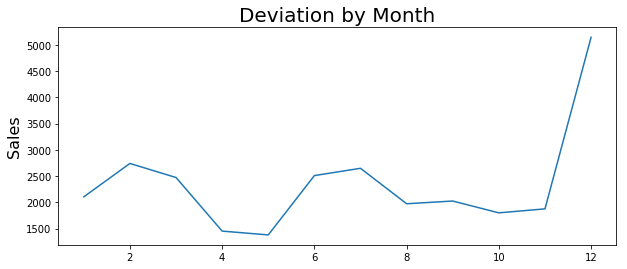

In [26]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [27]:
december_date=lim_catfish_sales[lim_catfish_sales.index.month==12]

In [28]:
december_date

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [29]:
min_dev = 9999999
curr_anomaly = None
for date in december_date.index:
    other_data = december_date[december_date.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [30]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

In [31]:
december_date[(december_date.index != curr_anomaly) & (december_date.index < test_data.index[0])]

Date
1996-12-01    16898
1997-12-01    18278
Name: Total, dtype: int64

In [32]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_date[(december_date.index != curr_anomaly) & (december_date.index < test_data.index[0])].mean()

In [33]:
december_date[(december_date.index != curr_anomaly) & (december_date.index < test_data.index[0])]

Date
1996-12-01    16898
1997-12-01    18278
Name: Total, dtype: int64

In [34]:
december_date[(december_date.index != curr_anomaly)]

Date
1996-12-01    16898
1997-12-01    18278
1999-12-01    22372
Name: Total, dtype: int64

In [35]:
december_date[(december_date.index < test_data.index[0])]

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
Name: Total, dtype: int64

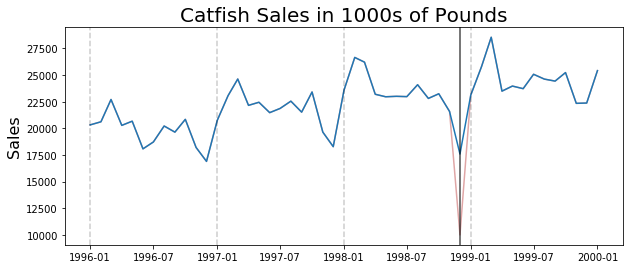

In [36]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

In [37]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [38]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average

In [39]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

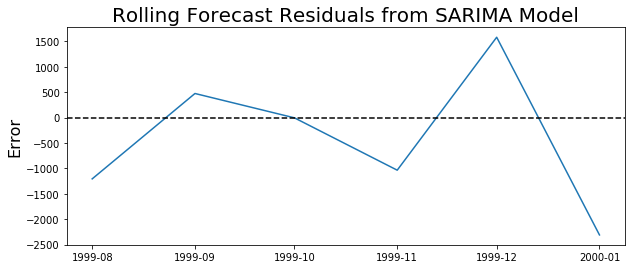

In [40]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

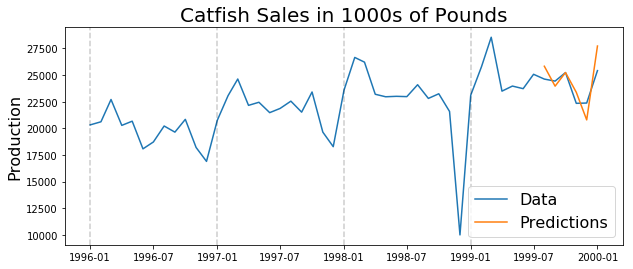

In [41]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [42]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0461


In [43]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1327.9937248847727
